# Core Assignment 2 - Hypothesis Testing with Insurance Data

- Name: Tyler Schelling
- Date: 1/12/2023

---

## Assignment

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

---

### Imports and Load Data

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
df = pd.read_csv('Data/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Question 1 - Do smokers have higher insurance charges than non-smokers?

### 1.1 - State your Null Hypothesis and Alternative Hypothesis.

- $H_0$ (Null Hypothesis): No difference in insurance charges between smokers and non-smokers.
- $H_A$ (Alternative Hypothesis): Smokers have higher insurance charges than non-smokers.

### 1.2 - Select the correct test according to the data type and number of samples.

- Type of Data?: Numerical data (Charges)
- How many groups/samples?: Two groups (Smoker and non-smoker)
---
- Which test is appropriate?: 2 sample T-test

In [3]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
df = df.replace({'smoker': {'yes': True, 'no':False}})

In [5]:
needed_cols = ['smoker', 'charges']
df[needed_cols]

,smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [6]:
smoker_df = df.loc[df['smoker']==True, needed_cols]
smoker_df

,smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [7]:
non_smoker_df = df.loc[df['smoker']==False, needed_cols]
non_smoker_df

,smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


### 1.3 - Test the assumptions of your selected test.

#### Check for and Remove Outliers

In [8]:
smoker_group = smoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [9]:
non_smoker_group = non_smoker_df['charges']
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [10]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

In [11]:
smoker_group = smoker_group[~smoker_outliers]

In [12]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3

In [13]:
non_smoker_group = non_smoker_group[~non_smoker_outliers]

#### Test for Normality

In [14]:
result = stats.normaltest(smoker_group)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [15]:
result = stats.normaltest(non_smoker_group)
result

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

#### Test for Equal Variances

In [16]:
result = stats.levene(smoker_group, non_smoker_group)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [17]:
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


### 1.4 - Execute the Selected Test

In [18]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [19]:
result.pvalue<0.05

True

### 1.5 - Interpret your p-value and reject or fail to reject your null hypothesis.

- The p-value was lower than the alpha (0.05).
    - The null hypothesis is rejected.
    
- It is not a normal distribution.
- Statistical significance exists.

### 1.6 - Show a supporting visualization

In [20]:
plot_df =  pd.concat([smoker_df, non_smoker_df])
plot_df

,smoker,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


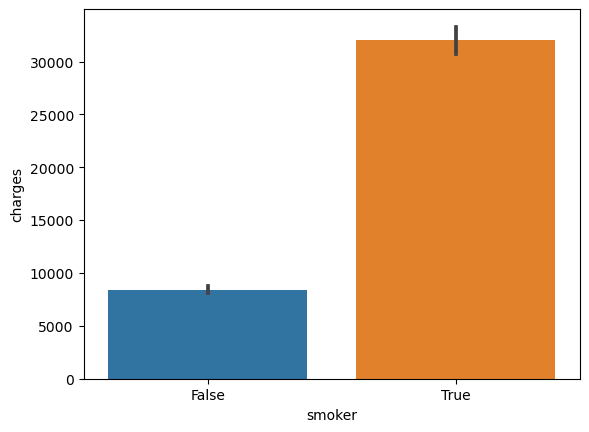

In [21]:
sns.barplot(data=plot_df, x='smoker', y='charges');

## Question 2 - Are men more likely to smoke than women?

### 2.1 - State your Null Hypothesis and Alternative Hypothesis.

- $H_0$ (Null Hypothesis): No difference in the likelihood of smoking amongst men and women.
- $H_A$ (Alternative Hypothesis): Men are more likely to smoke than women.

### 2.2 - Select the correct test according to the data type and number of samples

- Type of Data?: Categorical data (Sex)
- How many groups/samples?: Two groups (Smoker and non-smoker)
---
- Which test is appropriate?: Chi-Square

### 2.3 - Test the assumptions of your selected test

In [22]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,False,True
sex,,
female,547,115
male,517,159


### 2.4 - Execute the Selected Test

In [23]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [24]:
p < 0.05

True

### 2.5 - Interpret your p-value and reject or fail to reject your null hypothesis

- The p-value was lower than the alpha (0.05).
    - The null hypothesis is rejected.
   
- Statistical significance exists.

### 2.6 - Show a supporting visualization

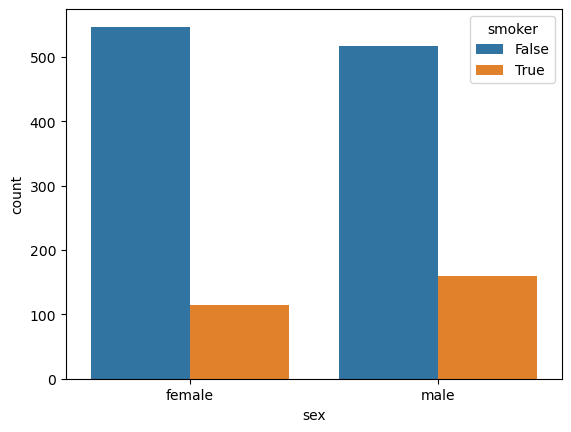

In [25]:
sns.countplot(data=df, x='sex',hue='smoker');

## Question 3 - Do different regions have different charges, on average?

### 3.1 - State your Null Hypothesis and Alternative Hypothesis.

- $H_0$ (Null Hypothesis): No difference in the average charges across regions.
- $H_A$ (Alternative Hypothesis): Different regions have different charges on average.

### 3.2 - Select the correct test according to the data type and number of samples

- Type of Data?: Numerical data (Charges)
- How many groups/samples?: More than 2 (Regions)
---
- Which test is appropriate?: ANOVA and/or Tukey

### 3.3 Test the assumptions of your selected test.

#### Check for and Remove Outliers

In [26]:
groups = {}
for region in df['region'].unique():
    data = df.loc[df['region'] == region, 'charges']
    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [27]:
for region, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} outliers were removed from the {region} group.")
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group.
2 outliers were removed from the southeast group.
7 outliers were removed from the northwest group.
4 outliers were removed from the northeast group.


#### Test for Normality

In [28]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p':p, 'test stat': stat}

In [29]:
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [30]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


#### Test for Equal Variances

In [31]:
result = stats.levene(*groups.values())
result

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

The groups did not satisfy the test for equal variances.

- A Kruskal-Wallis test will be performed instead of the one-way ANOVA.

### 3.4 - Execute the Selected Test

In [32]:
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

### 3.5 - Interpret your p-value and reject or fail to reject your null hypothesis.

- The p-value was higher than the alpha (0.05).
    - The null hypothesis was not rejected.
- No significant difference in charges across the regions.

### 3.6 - Show a supporting visualization

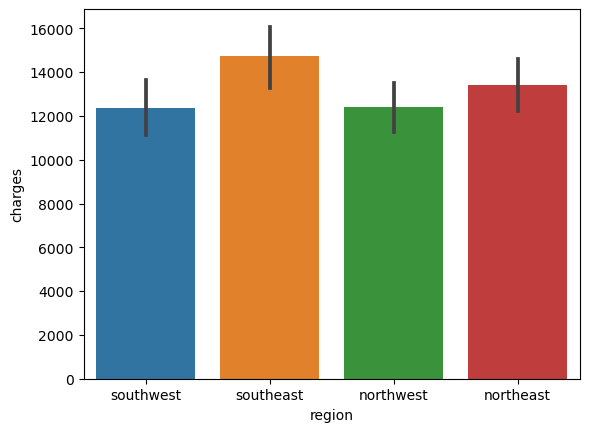

In [33]:
sns.barplot(data=df, x='region', y='charges');